# Step 1 : Business Understanding
* Objective : The objective of this dataset is to predict energy consumption in buildings based on structural, usage, and environmental features.
It uses inputs like building type, square footage, number of occupants, appliances used, and average temperature.
This helps in understanding energy usage patterns across different days of the week.
The goal is to enable efficient energy management and cost optimization for building operations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\gagan soni\Downloads\test_energy_data.csv")
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


# Step 2: Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [4]:
df.shape

(100, 7)

In [5]:
df.size

700

In [6]:
df.sample(5)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
34,Residential,28070,10,33,12.93,Weekend,3598.87
84,Residential,31487,60,3,17.97,Weekday,3694.52
32,Commercial,49354,84,38,15.03,Weekday,6042.56
33,Commercial,19926,27,17,19.33,Weekend,3509.64
8,Industrial,20482,24,16,23.00,Weekend,3969.09


In [7]:
df['Building Type'].unique()

array(['Residential', 'Commercial', 'Industrial'], dtype=object)

In [8]:
df['Building Type'].value_counts()

Building Type
Residential    40
Industrial     34
Commercial     26
Name: count, dtype: int64

In [9]:
df['Day of Week'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [10]:
df['Day of Week'].value_counts()

Day of Week
Weekend    56
Weekday    44
Name: count, dtype: int64

In [11]:
df.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [12]:
continious = ['Square Footage','Number of Occupants','Appliances Used','Average Temperature']

# Step 3: Exploratry Data Analysis

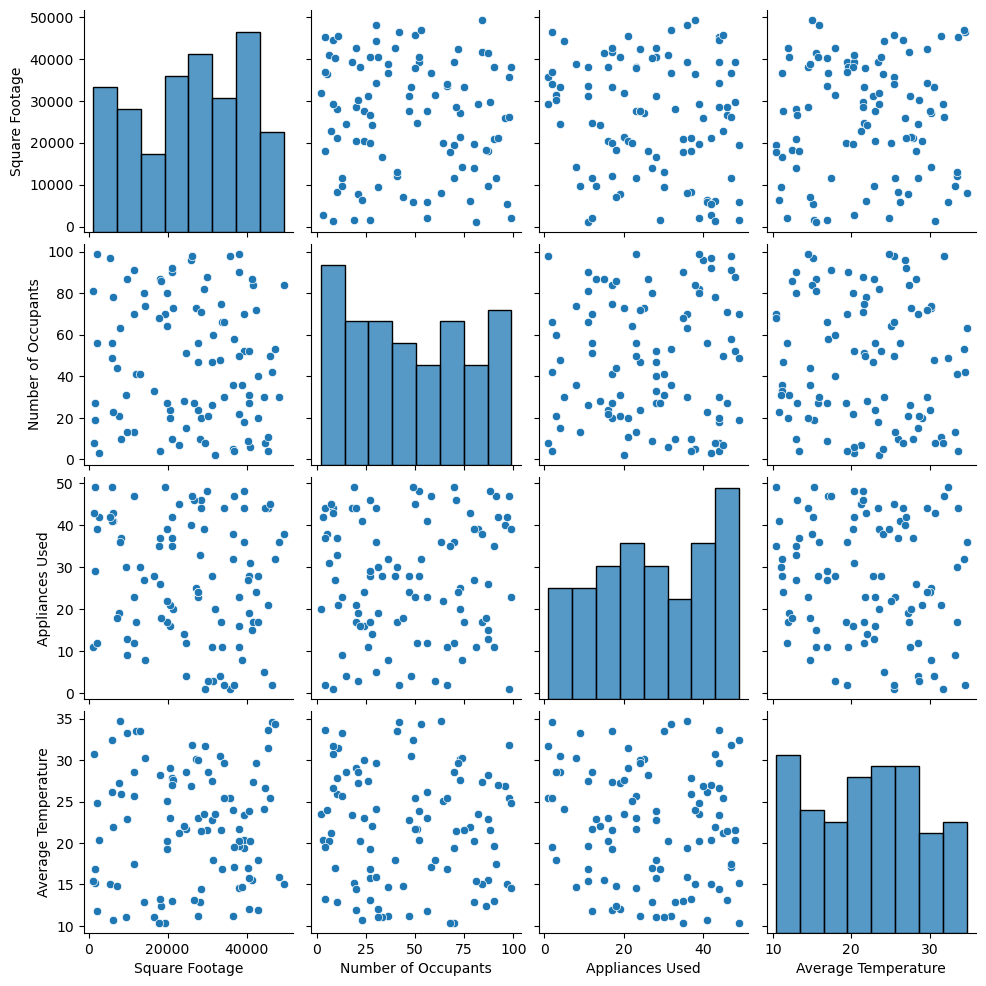

In [13]:
sns.pairplot(df[continious])
plt.show()

In [14]:
df[continious].skew()

Square Footage        -0.218762
Number of Occupants    0.159334
Appliances Used       -0.150855
Average Temperature    0.007284
dtype: float64

<Axes: >

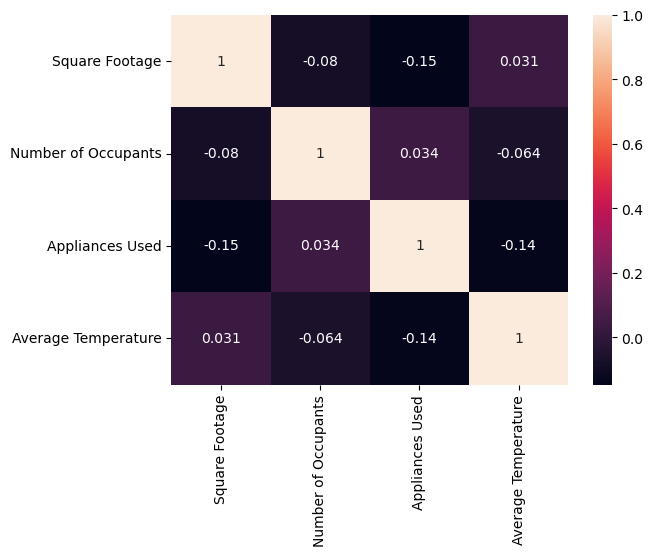

In [15]:
sns.heatmap(df[continious].corr(),annot = True)

* based on the corr() i observ and i create a new columns season

In [16]:
bins = [10,20,28,35]
slot = ['winter','rainy','summer']

df['Season'] =   pd.cut(df['Average Temperature'],bins = bins , labels = slot)

In [17]:
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption,Season
0,Residential,24563,15,4,28.52,Weekday,2865.57,summer
1,Commercial,27583,56,23,23.07,Weekend,4283.80,rainy
2,Commercial,45313,4,44,33.56,Weekday,5067.83,summer
3,Residential,41625,84,17,27.39,Weekend,4624.30,rainy
4,Residential,36720,58,47,17.08,Weekday,4820.59,winter


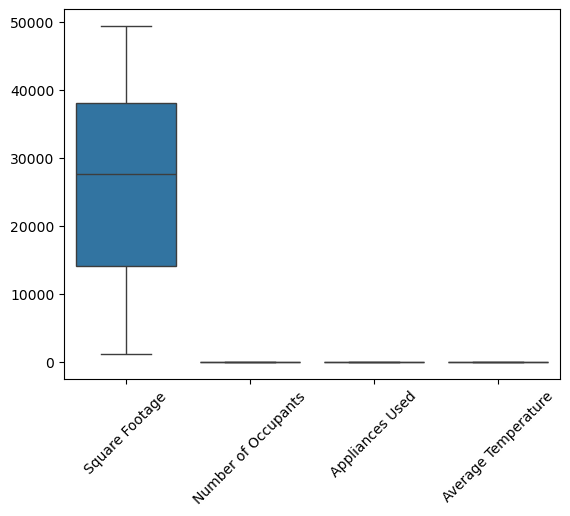

In [18]:
sns.boxplot(df[continious])
plt.xticks(rotation = 45)
plt.show()

* there is no outlire 

# Groupby

In [19]:
df.groupby('Building Type')['Energy Consumption'].mean()

Building Type
Commercial     4446.380769
Industrial     4541.185000
Residential    3718.791000
Name: Energy Consumption, dtype: float64

In [20]:
df.groupby('Day of Week')['Energy Consumption'].mean()

Day of Week
Weekday    4345.877500
Weekend    4063.200357
Name: Energy Consumption, dtype: float64

In [21]:
df.groupby('Season')['Energy Consumption'].mean()

Season
winter    4242.342895
rainy     4220.488974
summer    4041.292609
Name: Energy Consumption, dtype: float64

# crosstab

<Axes: xlabel='Season', ylabel='Day of Week'>

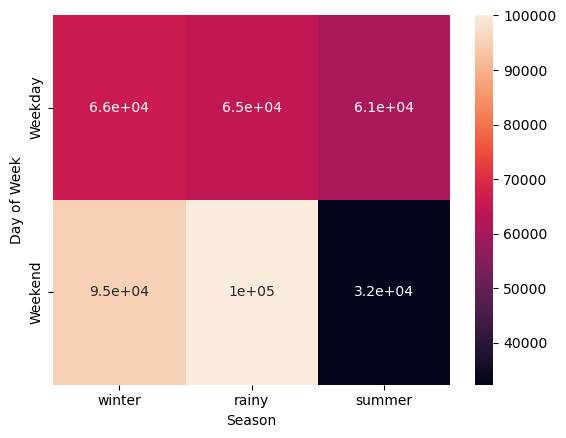

In [22]:
sns.heatmap(pd.crosstab(
    df['Day of Week'],
    df['Season'],
    values=df['Energy Consumption'],
    aggfunc='sum'
),annot  = True)

<Axes: xlabel='Building Type', ylabel='Season'>

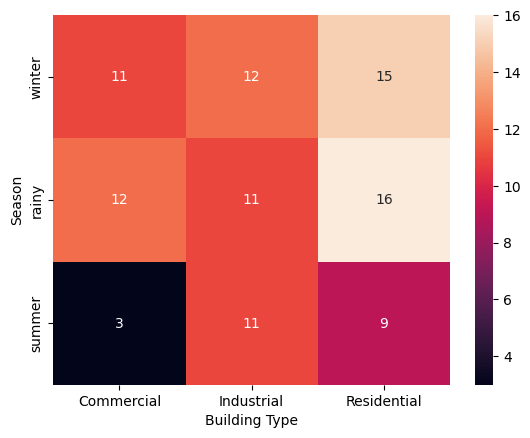

In [23]:
sns.heatmap(pd.crosstab(df['Season'], df['Building Type']),annot = True)

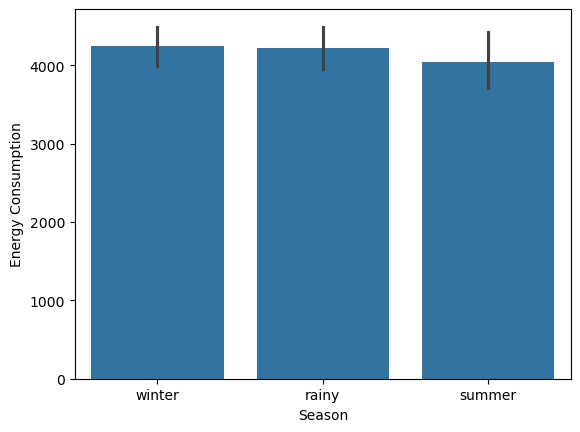

In [24]:
sns.barplot(x = df['Season'],y = df['Energy Consumption'])
plt.show()

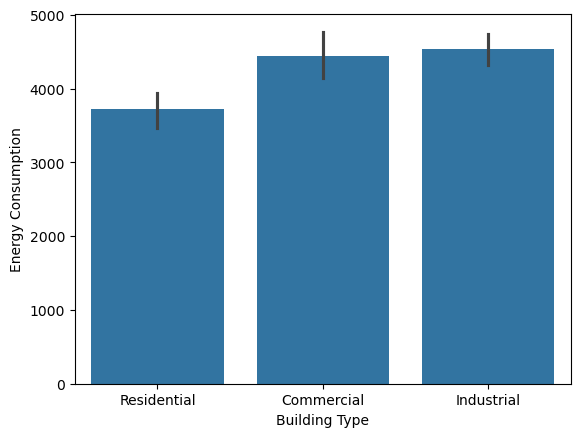

In [25]:
sns.barplot(x = df['Building Type'],y = df['Energy Consumption'])
plt.show()

## Encoding

In [26]:
df = pd.get_dummies(df,columns = ['Building Type','Day of Week','Season'],drop_first = True).astype(int)
df.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend,Season_rainy,Season_summer
0,24563,15,4,28,2865,0,1,0,0,1
1,27583,56,23,23,4283,0,0,1,1,0
2,45313,4,44,33,5067,0,0,0,0,1
3,41625,84,17,27,4624,0,1,1,1,0
4,36720,58,47,17,4820,0,1,0,0,0


In [27]:
X = df.drop(columns = 'Energy Consumption')
y = df['Energy Consumption']

## Train test split

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.25)

# Step 4: Modelling

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Step 5:  Evolution

In [30]:
# Prediction
y_pred_train = model.predict(X_train)

# train r2_score
from sklearn.metrics import r2_score
print('Train_r2_score pearsentage',(r2_score(y_train,y_pred_train))*100)

# cross validation score
from sklearn.model_selection import cross_val_score 
print('cross_val_score persentage',(cross_val_score(model,X_train,y_train,cv = 5).mean())*100)

# prediction
y_pred_test = model.predict(X_test)

# test r2_score
r2_score
print('test_r2_score persenteage ',(r2_score(y_test,y_pred_test))*100)

Train_r2_score pearsentage 99.99971482144612
cross_val_score persentage 99.9995587183161
test_r2_score persenteage  99.99959485909756


# Step 6: check for assumption
* L = linearity of error
* I = independent of errors
* N = normality of error
* E = equal varience of eroor

### linearity error

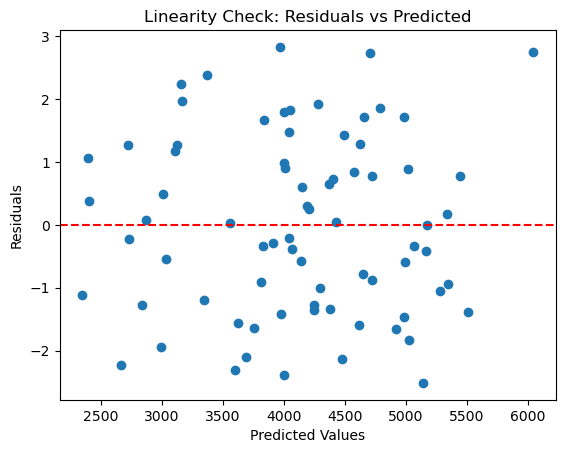

In [31]:
Residuals = y_train - y_pred_train 
plt.scatter(y_train,Residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Linearity Check: Residuals vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

### independent of errors

In [32]:
from statsmodels.api import OLS
OLS(y_train,X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Energy Consumption   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              2108.
Date:                Wed, 18 Jun 2025   Prob (F-statistic):                    1.45e-77
Time:                        17:30:01   Log-Likelihood:                         -519.75
No. Observations:                  75   AIC:                                      1058.
Df Residuals:                      66   BIC:                                      1078.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Square Footage                0.0552      0.002     23.769      0.000       0.051       0.060
Number of Occupants          11.9865      1.011     11.854      0.000       9.968      14.005
Appliances Used              30.5549      2.035     15.013      0.000      26.491      34.618
Average Temperature          83.7637      7.862     10.655      0.000      68.067      99.460
Building Type_Industrial    744.7813     77.046      9.667      0.000     590.955     898.608
Building Type_Residential  -388.2697     76.251     -5.092      0.000    -540.510    -236.029
Day of Week_Weekend          86.5637     62.477      1.386      0.171     -38.176     211.303
Season_rainy               -736.9794    109.658     -6.721      0.000    -955.919    -518.040
Season_summer             -1286.6332    171.260     -7.513      0.000   -1628.564    -944.702
==============================================================================
Omnibus:                        2.590   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                2.227
Skew:                          -0.422   Prob(JB):                        0.328
Kurtosis:                       3.008   Cond. No.                     1.81e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### normality of error

In [34]:
Residuals.skew()

0.1320326538192589

### equal varience of eroor

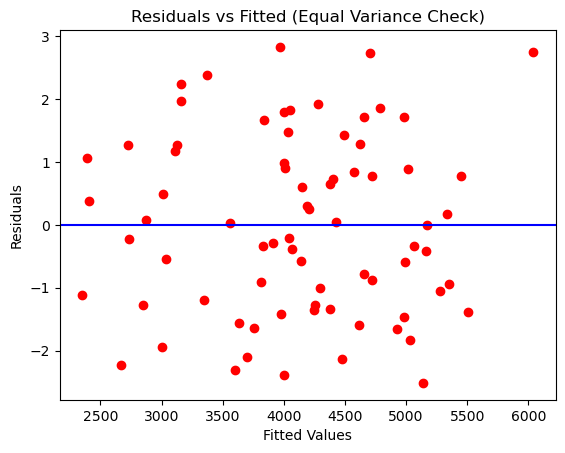

In [35]:
plt.scatter(y_pred_train,Residuals,c = 'r')
plt.axhline(y = 0 ,color = 'blue')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title("Residuals vs Fitted (Equal Variance Check)")
plt.show()